### **PART 1 - GET TO KNOW YOUR DATA!**

This time we are going to pull data directly from the internet.

Step 1: Import the neccessary libraries.

In [ ]:
import pandas as pd

c:\Users\TripKar\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\TripKar\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


Step 2: Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv) and save it in a variable named food.

In [ ]:
#Hint: to get the date, check what sort of delimiter would you use?
import pandas as pd

# URL of the dataset
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

# Read the TSV file into a DataFrame
food=pd.read_csv(url, sep='\t')
food

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


Step 3: I want to see what the first ten rows of the dataset looks like. How?

In [ ]:
# for the first ten row we use head function like dataframe.head(10)
food.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


Step 4. What is the number of observations in the dataset?

In [ ]:
# to check num of observation we use shape and len() function but using shape function we get the rows and columns number but len function give me totel num of rows

# food.shape[0]
len(food)

4622

Step 5. What is the number of columns in the dataset?

In [ ]:
# food.shape[1]
len(food.columns)

5

Step 6. Print the name of all the columns.

In [ ]:
food.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

Step 7. How is the dataset indexed?

In [ ]:
#Hint: think or look for a command that gives information about the dataset but this time, only the index from the dataset.
# the index of the dataset is start from 0 and end at 4622 and step is 1 so the index is in sequance.
food.index

RangeIndex(start=0, stop=4622, step=1)

*Step* 8. Which was the most-ordered item?

In [ ]:
total_item=food.groupby('item_name')['quantity'].sum()
most_ordered_item=total_item.idxmax()
most_ordered_item

'Chicken Bowl'

Step 9. For the most-ordered item, how many items were ordered?

In [ ]:
quantity_item=total_item.max()
quantity_item

761

Step 10. What was the most ordered item in the choice_description column?

In [ ]:
choice_descrip=food['choice_description'].value_counts()
choice_descrip.idxmax()

'[Diet Coke]'

Step 11. How many items were orderd in total?

In [ ]:
total_item_were_orderd=food.shape[0]
total_item_were_orderd

4622

Step 12. Turn the item price into a float

Step 12.a. Check the item price type

In [ ]:
#check itemprice type before changing  it
print(food['item_price'].dtype)


object


Step 12.b. Create a lambda function and change the type of item price.

In [ ]:
#Hint: You can first create a lambda function and then store it in a variable. After that, you can (APPLY) it on the relevant column :)
convert_price=lambda x:float(x.replace('$','')) if isinstance(x, str) else x
food['item_price']=food['item_price'].apply(convert_price)

Step 12.c. Check the item price type now

In [ ]:
#make sure the itemprice type has changed now
print(food['item_price'].dtype)

float64


Step 13. How much was the revenue for the period in the dataset?

In [ ]:
#Hint: Revenue = Quantity into ItemPrice
revenue=(food['quantity']*food['item_price']).sum()
print(f'The total revenue is: ${revenue}')


The total revenue is: $39237.02


Step 14. How many orders were made in the period?

In [ ]:
orders_in_period=food.shape[0]
orders_in_period

4622

Step 15. What is the average revenue amount per order?

In [ ]:
mul=food['item_price']*food['quantity']
revenue_amount_per_order=mul.sum()/food['order_id'].nunique()
print(f'The average revenue amount per order is: ${revenue_amount_per_order:.2f}')

The average revenue amount per order is: $21.39


Step 16. How many different items are sold?

In [ ]:
diff_item_sold=food['item_name'].nunique()
diff_item_sold

50

### **Part 2 - FILTER AND SORT YOUR DATA!**

Step 17. How many products cost more than $10.00?

In [ ]:
# you already  converted the itemprice into flaot, now delete the duplicates in item_name and quantity.
unique_items=food.drop_duplicates(subset=['item_name','quantity'])
unique_items
# select only the products with quantity equals to 1 and then print the unqiue count only
filter_item=unique_items[unique_items['quantity']==1]
cost_more_then_10=filter_item[filter_item['item_price']>10.00]
cost_more_then_10

,order_id,quantity,item_name,choice_description,item_price
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
39,19,1,Barbacoa Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.75
57,26,1,Veggie Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25
62,28,1,Veggie Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
168,75,1,Barbacoa Crispy Tacos,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",11.75
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
250,109,1,Chicken Salad,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",10.98
606,250,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Pinto Beans, Cheese, Gua...",11.89
738,304,1,Veggie Soft Tacos,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25


Step 18. Sort by the name of the item

In [ ]:
sorted_items = cost_more_then_10.sort_values(by='item_name')
sorted_items

,order_id,quantity,item_name,choice_description,item_price
39,19,1,Barbacoa Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.75
168,75,1,Barbacoa Crispy Tacos,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",11.75
1229,501,1,Barbacoa Salad Bowl,"[Fresh Tomato Salsa, [Rice, Fajita Vegetables,...",11.89
1132,468,1,Carnitas Salad Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",11.89
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
250,109,1,Chicken Salad,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
606,250,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Pinto Beans, Cheese, Gua...",11.89
62,28,1,Veggie Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
57,26,1,Veggie Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25


Step 19. What was the quantity of the most expensive item ordered?


In [ ]:
most_expensive_item=food.loc[food['item_price'].idxmax()]
quantity_of_the_most_expensive_item=most_expensive_item['quantity']
quantity_of_the_most_expensive_item

15

In [ ]:
# food.iloc[[3598]]

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25


Step 20. How many times did someone order more than one Canned Soda?

In [ ]:
#Hint: you can also use boolean condition
cannedd_oreder=(food['item_name']=='Canned Soda') & (food['quantity']>1)
filtered_orders = food[cannedd_oreder]
filtered_orders.shape[0]

20

BONUS QUESTION: Pandas is used for Data Analysis. Create some unique pandas insight from your dataset and code it here.

Bonus Question is optional, but attempting it would result in 5 Grace Points :)

Top 10 Most Ordered Items

In [ ]:
# This analysis will show which items are the most frequently ordered.
top_items = food.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(10)
top_items

item_name
Chicken Bowl                    761
Chicken Burrito                 591
Chips and Guacamole             506
Steak Burrito                   386
Canned Soft Drink               351
Chips                           230
Steak Bowl                      221
Bottled Water                   211
Chips and Fresh Tomato Salsa    130
Canned Soda                     126
Name: quantity, dtype: int64

### **THE END!!!**
or maybe not :)


We still need to practice Grouping more.

### **PART 3 - GROUPING!!**

But now, we will be changing our dataset a bit. Get your dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user) and store it in a variable called users.

In [ ]:
#Hint: this time, you may need to change your choice of delimieter. Check and see how the values are being seperated.
#Also this time, be on a lookout of what column would you use as an index?
# Load the dataset from the specified URL using the correct delimiter
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, sep='|')

# Display the first few rows of the DataFrame
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


Step 1. Discover what is the mean age per occupation


In [ ]:
mean_age_per_occupatiopn=users.groupby('occupation')['age'].mean()
mean_age_per_occupatiopn

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Step 2. Discover the Male ratio per occupation and sort it from the most to the least

In [ ]:
#The output of this cell is given below. Your output should match this!
#In Simple words, you have to calculate the percentage of male users grouped by their occupation.
male_ratio=users.groupby('occupation')["gender"].apply(lambda x:(x=='M').mean())
male_ratio=male_ratio.sort_values(ascending=False)
male_ratio=male_ratio*100
male_ratio


occupation
doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
Name: gender, dtype: float64

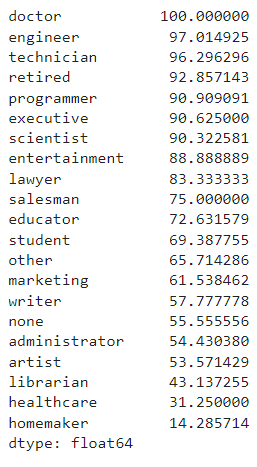

Step 3. For each occupation, calculate the minimum and maximum ages

In [ ]:
min_age = users.groupby('occupation')['age'].min()
min_age

occupation
administrator    21
artist           19
doctor           28
educator         23
engineer         22
entertainment    15
executive        22
healthcare       22
homemaker        20
lawyer           21
librarian        23
marketing        24
none             11
other            13
programmer       20
retired          51
salesman         18
scientist        23
student           7
technician       21
writer           18
Name: age, dtype: int64

In [ ]:
max_age = users.groupby('occupation')['age'].max()
max_age

occupation
administrator    70
artist           48
doctor           64
educator         63
engineer         70
entertainment    50
executive        69
healthcare       62
homemaker        50
lawyer           53
librarian        69
marketing        55
none             55
other            64
programmer       63
retired          73
salesman         66
scientist        55
student          42
technician       55
writer           60
Name: age, dtype: int64

Step 4.  For each combination of occupation and gender, calculate the mean age

In [ ]:
mean_age = users.groupby(['occupation', 'gender'])['age'].mean().unstack()
mean_age

gender,F,M
occupation,,
administrator,40.638889,37.162791
artist,30.307692,32.333333
doctor,NaN,43.571429
educator,39.115385,43.101449
engineer,29.500000,36.600000
entertainment,31.000000,29.000000
executive,44.000000,38.172414
healthcare,39.818182,45.400000
homemaker,34.166667,23.000000


Step 5. For each occupation present the percentage of women and men

In [ ]:
# Create a DataFrame and apply count to gender
gender_count = users['gender'].value_counts().reset_index()
gender_count.columns = ['gender', 'count']

# Create a DataFrame and apply count for each occupation
occupation_count = users['occupation'].value_counts().reset_index()
occupation_count.columns = ['occupation', 'occup_count']

#Count the number of men and women for each occupation
gender_occupation_count = users.groupby(['occupation', 'gender']).size().unstack(fill_value=0)

# Calculate the percentage of each gender for each occupation
# Use the correct total counts for each occupation
gender_percentage = (gender_occupation_count.div(gender_occupation_count.sum(axis=1), axis=0) * 100).fillna(0)

# Step 4: Reset index and prepare the final DataFrame
result = gender_percentage.reset_index()

# Rename columns for clarity
result.columns = ['occupation', 'women (%)', 'men (%)']
result

,occupation,women (%),men (%)
0,administrator,45.569620,54.430380
1,artist,46.428571,53.571429
2,doctor,0.000000,100.000000
3,educator,27.368421,72.631579
4,engineer,2.985075,97.014925
5,entertainment,11.111111,88.888889
6,executive,9.375000,90.625000
7,healthcare,68.750000,31.250000
8,homemaker,85.714286,14.285714
9,lawyer,16.666667,83.333333


Easy, right? I knew you could do it 💯

You are just left with 2 modules :)

### **PART 4 - APPLY**

Get your data from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv) and store it in a variable called crime

In [ ]:
#read your data and display first 5 rows
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv'
data = pd.read_csv(url)
data.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


Step 1. What is the type of the columns?

In [ ]:
data.dtypes

Year                  int64
Population            int64
Total                 int64
Violent               int64
Property              int64
Murder                int64
Forcible_Rape         int64
Robbery               int64
Aggravated_assault    int64
Burglary              int64
Larceny_Theft         int64
Vehicle_Theft         int64
dtype: object

Step 2. Convert the type of the column Year to datetime64

In [ ]:
data['Year'] = pd.to_datetime(data['Year'],format='%Y')

In [ ]:
data

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
5,1965-01-01,193526000,4739400,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
6,1966-01-01,195576000,5223500,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
7,1967-01-01,197457000,5903400,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
8,1968-01-01,199399000,6720200,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600
9,1969-01-01,201385000,7410900,661870,6749000,14760,37170,298850,311090,1981900,3888600,878500


Step 3. Set the Year column as the index of the dataframe

In [ ]:
data.set_index('Year', inplace=True)
data.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


Step 4. Delete the Total column

In [ ]:
data.drop(columns='Total', inplace=True)
data.shape

(55, 10)

Step 5. Group the year by decades and sum the values.

***Pay attention to the Population column number, summing this column is a mistake***

In [ ]:
# To learn more about .resample (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)
# To learn more about Offset Aliases (http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)

# Uses resample to sum each decade
decade_sum = data.resample('10AS').sum()

# Uses resample to get the max value only for the "Population" column
decade_population_max = data['Population'].resample('10YS').max()
decade_population_max
# Updating the "Population" column
decade_sum['Population'] = decade_population_max
decade_sum

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,201385000,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,220099000,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,248239000,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,272690813,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,307006550,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,318857056,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


Bonus Question: What is the most dangerous decade to live in the US?

In [ ]:
#Hint: Violent shows how dangerous the decade is
# Calculate the total of all crime categories for each decade
crime_columns = ['Violent', 'Property', 'Murder', 'Forcible_Rape', 'Robbery',
                 'Aggravated_assault', 'Burglary', 'Larceny_Theft', 'Vehicle_Theft']
decade_sum['Total_Crime'] = decade_sum[crime_columns].sum(axis=1)
decade_sum

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft,Total_Crime
Year,,,,,,,,,,,
1960-01-01,201385000,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100,98591660
1970-01-01,220099000,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900,201983370
1980-01-01,248239000,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411,262246703
1990-01-01,272690813,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418,273162730
2000-01-01,307006550,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834,229828783
2010-01-01,318857056,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080,100271792


In [ ]:
# Identify the decade with the highest total crime
most_dangerous_decade = decade_sum['Total_Crime'].idxmax()
highest_crime_value = decade_sum['Total_Crime'].max()

# Display the most dangerous decade and its total crime value
print(f"The most dangerous decade to live in the US was the {most_dangerous_decade.year}s with {highest_crime_value} total crimes reported.")

The most dangerous decade to live in the US was the 1990s with 273162730 total crimes reported.


### **PART 5 - MERGE/JOIN**

For this one, we will create our own dataset.

We will be dealing with both Numpy and Pandas in this one.

Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np

Step 2. **Create 3 differents Series, each of length 100, as follows:**

1. The first a random number from 1 to 4

2. The second a random number from 1 to 3

3. The third a random number from 10,000 to 30,000

In [ ]:
#name them s1,s2,s3
s1 = pd.Series(np.random.randint(1, 5, size=100))      # Random numbers from 1 to 4
s2 = pd.Series(np.random.randint(1, 4, size=100))      # Random numbers from 1 to 3
s3 = pd.Series(np.random.randint(10000, 30001, size=100))  # Random numbers from 10000 to 30000


Step 3. Let's create a DataFrame by joinning the Series by column.

In [ ]:
#try concat, but figure out the axis on your own :)
df = pd.concat([s1, s2, s3], axis=1)
df

,0,1,2
0,3,3,28092
1,4,1,22440
2,2,3,20709
3,1,2,11681
4,1,2,26202
...,...,...,...
95,4,1,23998
96,2,1,16995
97,2,1,23713
98,4,3,17954


Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [ ]:
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [ ]:
#join concat the values but still change the series into a df as well
bigcolumn = pd.DataFrame(pd.concat([s1, s2, s3], axis=0), columns=['bigcolumn'])
bigcolumn

,bigcolumn
0,3
1,4
2,2
3,1
4,1
...,...
95,23998
96,16995
97,23713
98,17954


Oops, it seems it is going only until index 99. Is it true?

If yes, then why yes?

Each Series 𝑠1, 𝑠2, and s3 is initialized with a length of 100.
resulting in exactly 100 random elements in each. This ensures that when these Series are concatenated into a DataFrame,
the DataFrame will also have 100 rows, corresponding to the size of the individual Series.

In [ ]:
#This question warrants a theoretical response. No code is required in this cell block
#If yes, then why yes?
# Each Series 𝑠1, 𝑠2, and s3 is initialized with a length of 100.
# resulting in exactly 100 random elements in each. This ensures that when these Series are concatenated into a DataFrame,
# the DataFrame will also have 100 rows, corresponding to the size of the individual Series.

Step 6. Reindex the DataFrame so it goes from 0 to 299

In [ ]:
df_reindexed = df.reset_index(drop=True)
df_reindexed


,bedrs,bathrs,price_sqr_meter
0,3,3,28092
1,4,1,22440
2,2,3,20709
3,1,2,11681
4,1,2,26202
...,...,...,...
95,4,1,23998
96,2,1,16995
97,2,1,23713
98,4,3,17954


### ***TA-DA. That's it. THE END!***